In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import tensorflow as tf

In [5]:
from typing import Dict


def read_tfrecord(serialized_example) -> Dict:

    feature_description = {
        'emotion': tf.io.FixedLenFeature((), tf.string),
        'intensity': tf.io.FixedLenFeature((), tf.string),
        'actor': tf.io.FixedLenFeature((), tf.string),
        'mel_spect': tf.io.FixedLenFeature((), tf.string)
    }

    example = tf.io.parse_single_example(serialized_example,
                                         feature_description)

    mel_spect = tf.io.parse_tensor(example['mel_spect'], out_type=np.float32)
    mel_spect = mel_spect.numpy()

    example['mel_spect'] = mel_spect

    return example

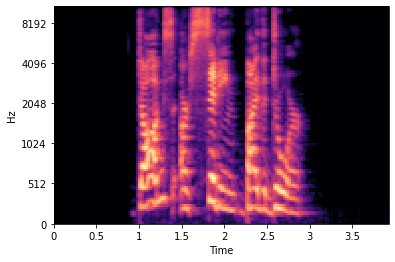

In [6]:
import librosa
import librosa.display

dataset = tf.data.TFRecordDataset('spectorgrams.tfrecord')

for item in dataset:
    record = read_tfrecord(item)
    
    librosa.display.specshow(record['mel_spect'], y_axis='mel', x_axis='time');
    break